In [2]:
# importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [4]:
#loading data

In [5]:
dataset = pd.read_csv('./advertising.csv')

In [6]:
dataset.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [7]:
x = dataset['Daily Time Spent on Site']
y = dataset['Clicked on Ad']

In [8]:
x.head()

0    68.95
1    80.23
2    69.47
3    74.15
4    68.37
Name: Daily Time Spent on Site, dtype: float64

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [12]:
x.describe()

count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily Time Spent on Site, dtype: float64

In [13]:
y.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Clicked on Ad, dtype: float64

In [16]:
dataset['Clicked on Ad'] = dataset['Clicked on Ad'].map({1:0, 0:1})

In [18]:
dataset.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              1  
1  2016-04-04 01:39:02              1  
2  2016-03-13 20:35:42              1  
3  2016-01-10 02:31:19              1  
4  2016-06-03 03:36:18              1

In [19]:
dataset['Clicked on Ad'] = dataset['Clicked on Ad'].map({'0':1, '1':0})

In [20]:
dataset.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11            NaN  
1  2016-04-04 01:39:02            NaN  
2  2016-03-13 20:35:42            NaN  
3  2016-01-10 02:31:19            NaN  
4  2016-06-03 03:36:18            NaN

In [ ]:
# NOTE NAN

In [21]:
#dependant an dindependant variables

In [24]:
y.map({1:0, 0:1}).head()

0    0
1    0
2    0
3    0
4    0
Name: Clicked on Ad, dtype: int64

In [26]:
x.head()

0    68.95
1    80.23
2    69.47
3    74.15
4    68.37
Name: Daily Time Spent on Site, dtype: float64

In [27]:
#scatter plot

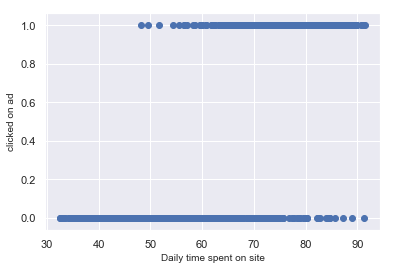

In [28]:
plt.scatter(x, y)
plt.xlabel('Daily time spent on site', fontsize=10)
plt.ylabel('clicked on ad', fontsize=10)
plt.show()

E:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


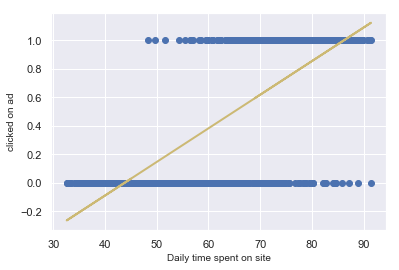

In [29]:
# plotting with linear linear regression line

x1=x
x = sm.add_constant(x)
reg_lin = sm.OLS(y,x).fit()

plt.scatter(x1,y)
yhat = x1 * reg_lin.params[1] + reg_lin.params[0]
plt.plot(x1, yhat, lw=2, color='C8')
plt.xlabel('Daily time spent on site', fontsize=10)
plt.ylabel('clicked on ad', fontsize=10)
plt.show()

Optimization terminated successfully.
         Current function value: 0.323657
         Iterations 7


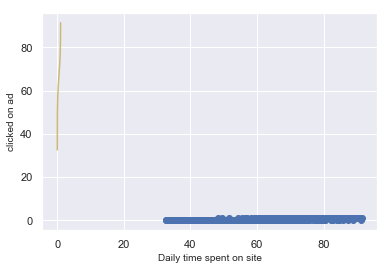

In [35]:
#PLOTTIG WITH LOGISTIC REG


reg_log = sm.Logit(y,x).fit()

def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))
    
f_sorted = np.sort(f(x1, reg_log.params[0], reg_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y)
plt.xlabel('Daily time spent on site', fontsize=10)
plt.ylabel('clicked on ad', fontsize=10)
plt.plot(f_sorted, x_sorted, color='C8')
plt.xlim = 0
plt.ylim = 0 
plt.show()


# NOTE : MAXIMUM ALLOWED ITERATIONS IN SM IS 35 AFTER THAT IT ITSELF WILL STOP UPDATING OBJ. FN.

In [32]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      998
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Apr 2019   Pseudo R-squ.:                  0.5331
Time:                        18:23:03   Log-Likelihood:                -323.66
converged:                       True   LL-Null:                       -693.15
                                        LLR p-value:                9.992e-163
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -12.5400      0.795    -15.766      0.000     -14.099     -10.981
Daily Time Spent on Site     0.1874      0.012     16.293      0.000       0.165       0.210
============================================================================================
"""

# NOTES


### CONDITIONS
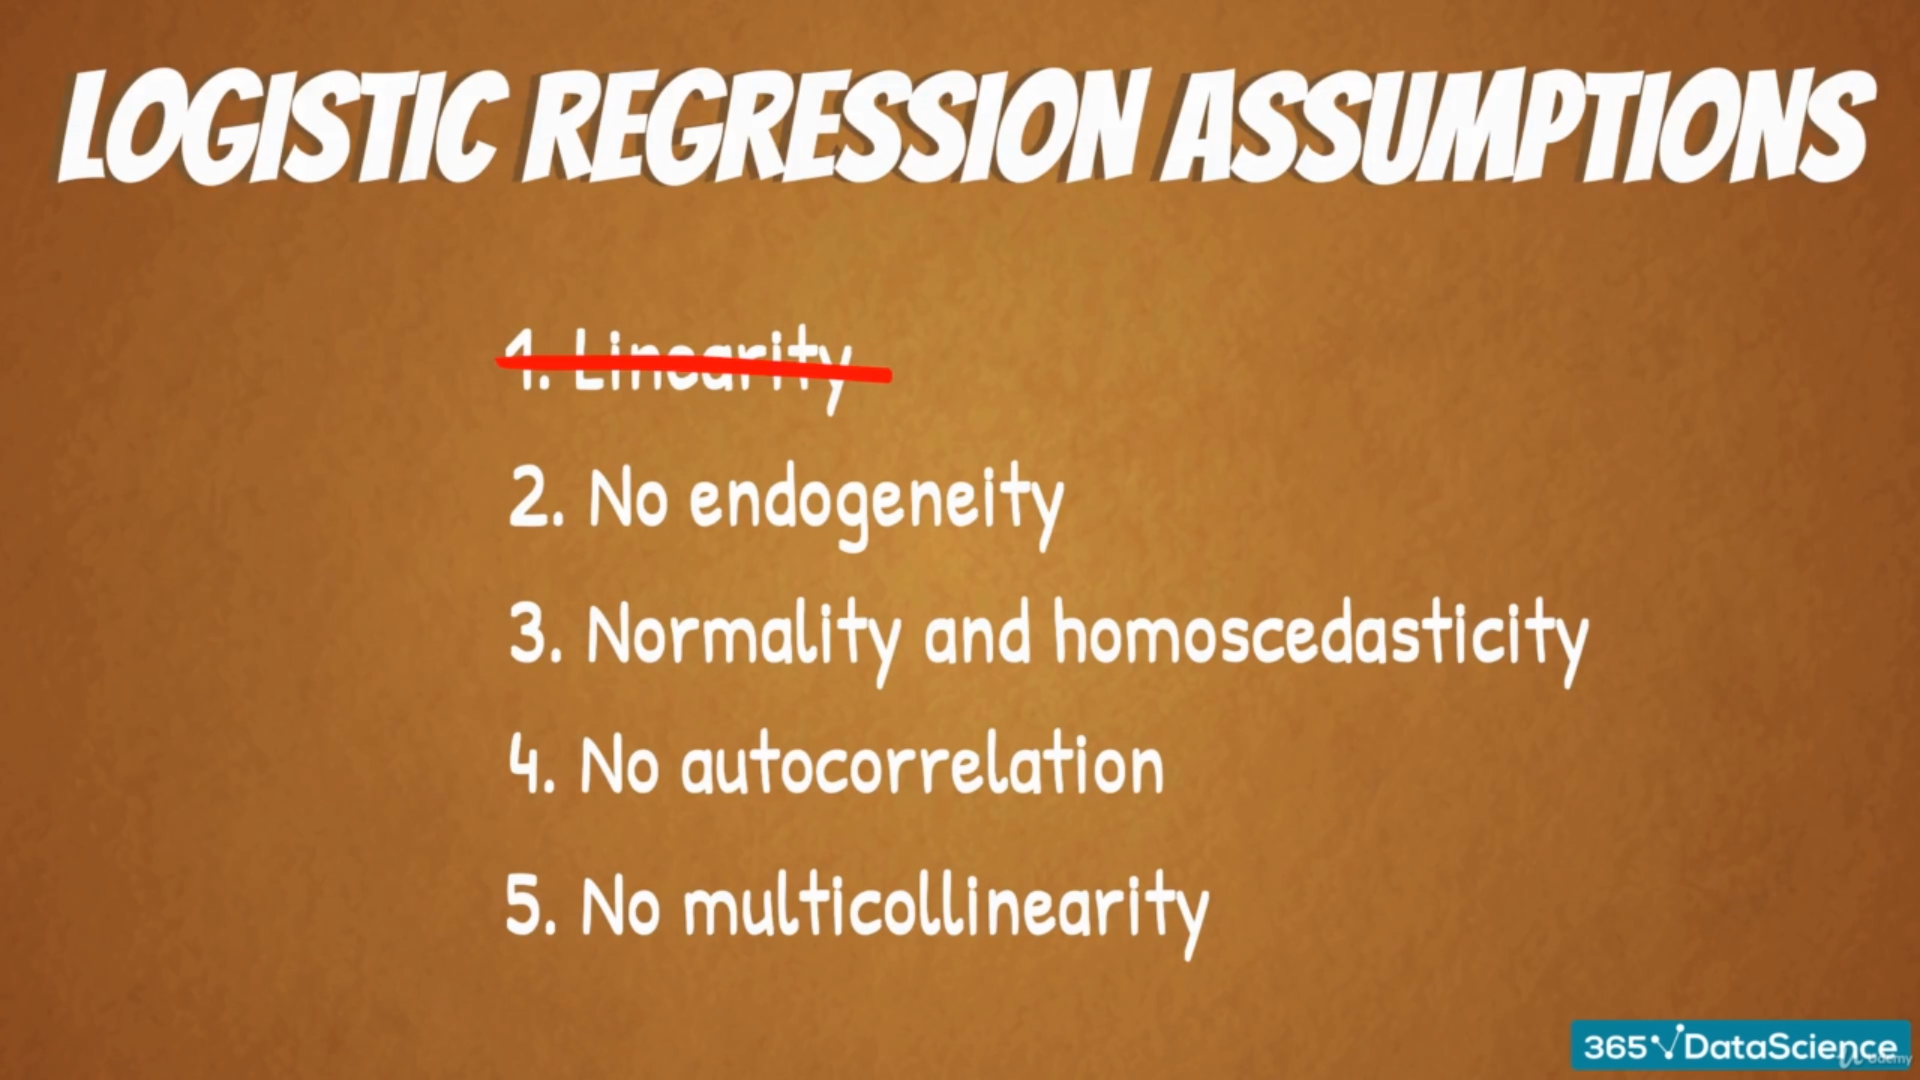

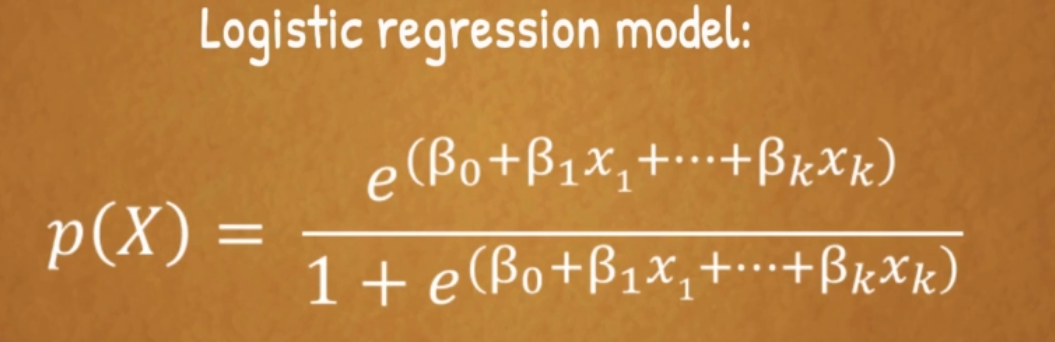

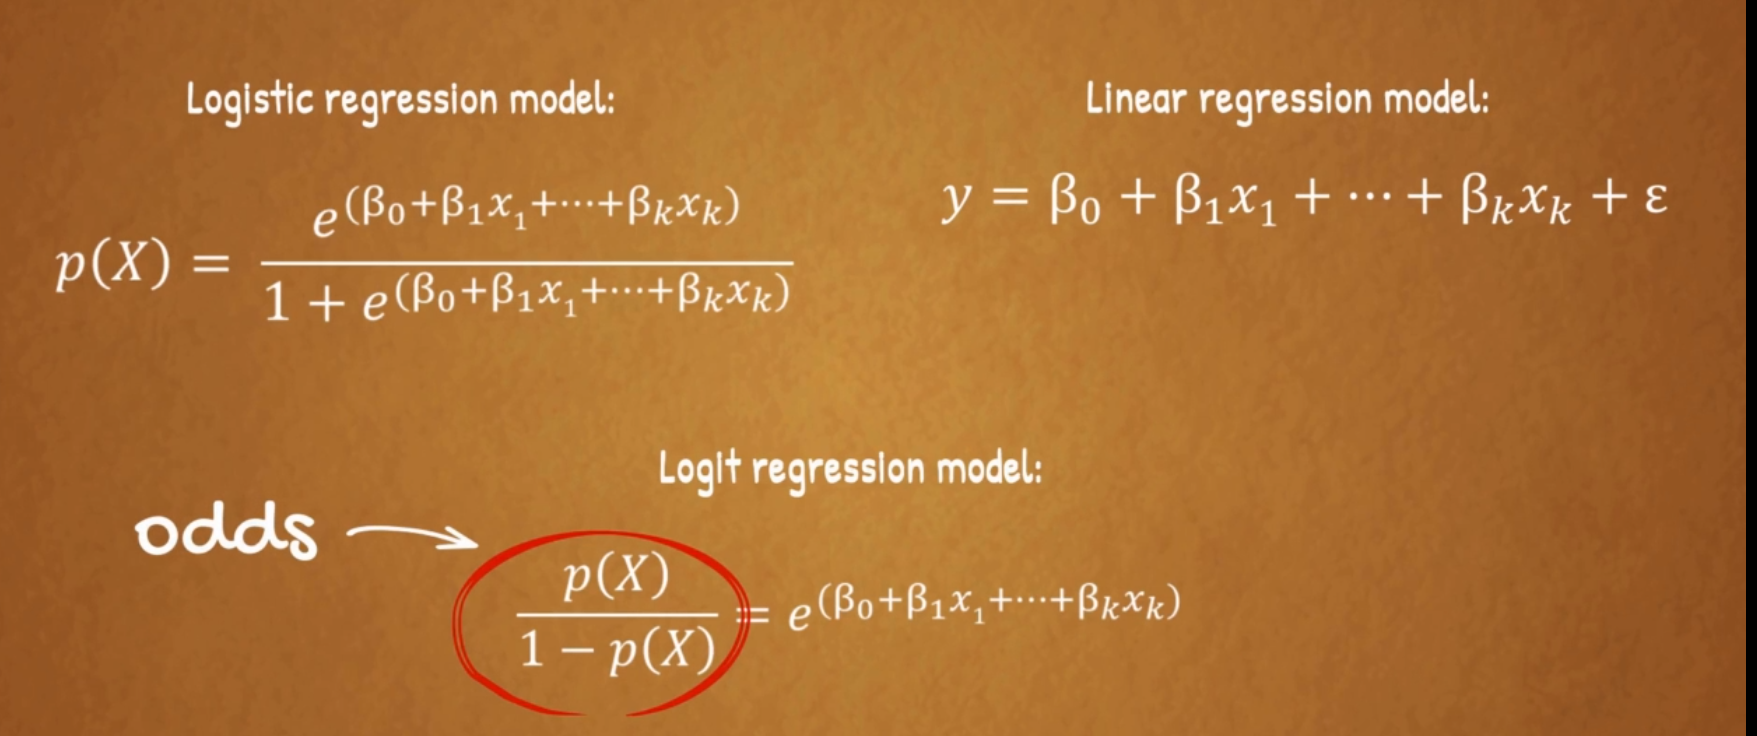

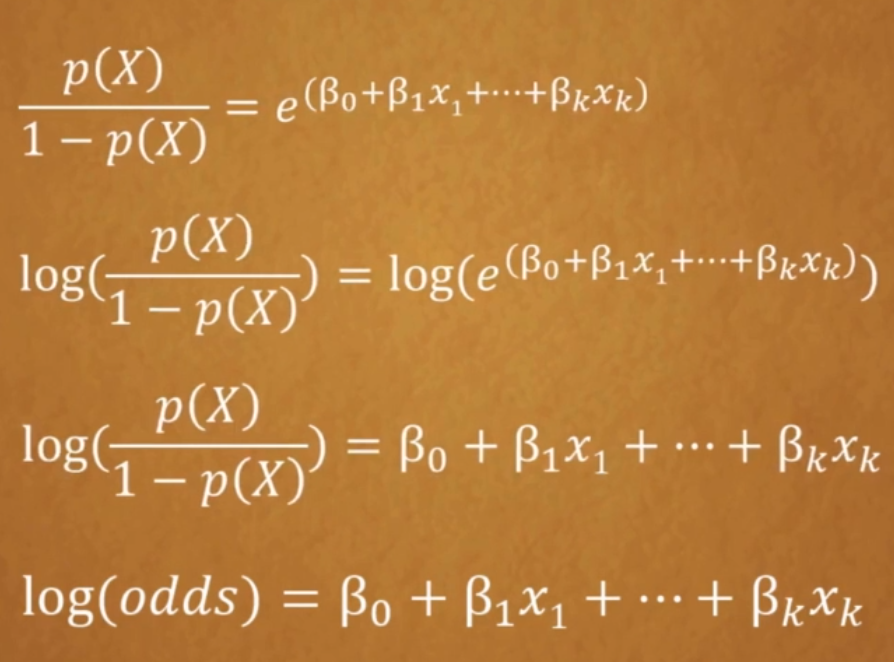

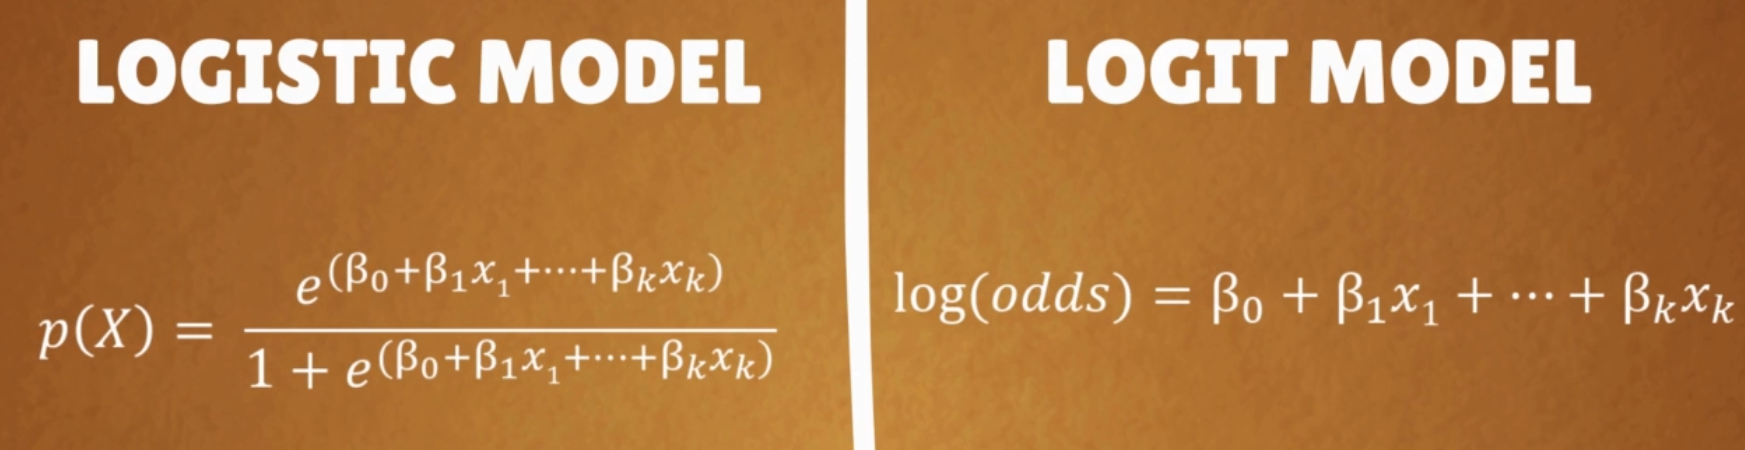